In [32]:
import numpy as np

In [33]:
###################################
##### DATOS ENTRADA LAPLACE #######
###################################
##Dimensiones de la placa
totDimX=20
totDimY=10
##Temperatura de los Bordes
tempBordeR=100
tempBordeL=0
tempBordeU=0
tempBordeD=0
###################################

#Numero de pasos
#nPasosX nPasosY: Cantidad de espacios que se deja para cada eje.
n=8 # nPasosX
m=4 # nPasosY
nPasosX=n
nPasosY=m

In [34]:
#Tamaño de Pasos
pasoX=(totDimX)/nPasosX
pasoY=(totDimY)/nPasosY
print(pasoX)
print(pasoY)

2.5
2.5


In [35]:
##INICIALIZAMOS EL ARRAY 
#calcArray: Array donde guardamos los valores F(x,y) de los puntos discretos.
calcArray = np.zeros((nPasosX+1,nPasosY+1))
calcArray

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [36]:
#boolArray: Array donde guardamaos que puntos discretos ya tenemos conocidos.
boolArray = np.full((nPasosX+1,nPasosY+1),False)
boolArray

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]])

In [37]:
#CONFIGURACION INICIAL DE LA PLACA
#SETEAMOS LOS BORDES
for j in range(1,nPasosY):
    calcArray[0][j]=tempBordeL
    calcArray[nPasosX][j]=tempBordeR
    boolArray[0][j]=True
    boolArray[nPasosX][j]=True

for i in range(1,nPasosX):
    calcArray[i][0]=tempBordeU
    calcArray[i][nPasosY]=tempBordeD  
    boolArray[i][0]=True
    boolArray[i][nPasosY]=True  
calcArray


array([[  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.],
       [  0., 100., 100., 100.,   0.]])

In [39]:
##indicesArray: Array que contendrá los indices para la recolocacion de los valores. Para Ploteo
indicesArray = np.full((nPasosX+1,nPasosY+1),-1)
contador = 0
for j in range(1,nPasosY):
    for i in range(1,nPasosX):
        indicesArray[i][j]=contador
        contador+=1
indicesArray

array([[-1, -1, -1, -1, -1],
       [-1,  0,  7, 14, -1],
       [-1,  1,  8, 15, -1],
       [-1,  2,  9, 16, -1],
       [-1,  3, 10, 17, -1],
       [-1,  4, 11, 18, -1],
       [-1,  5, 12, 19, -1],
       [-1,  6, 13, 20, -1],
       [-1, -1, -1, -1, -1]])

In [ ]:
## Definicion de funcion de Carga para Poisson (Aun no funcional)
def carga(x,y):
    return 0

El fin del método es obtener un sistema de ecuaciones, el cual será resuelto utilizando matrices, para apoyranos con la librería de numpy.

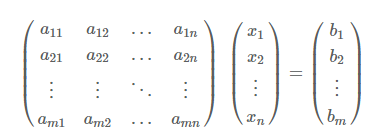

In [38]:
##Inicializando coefArray
#coefArray: Array donde se contendrá los Coeficientes para el sistema de Ecuaciones
nVariables= (nPasosX-1)*(nPasosY-1)
coefArray= np.zeros((nVariables,nVariables))
#coefArray

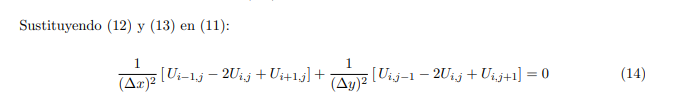

In [40]:
##Inicializando indepArray
#indepArray Array donde se contendrá los terminos independientes para el sistema de Ecuaciones
indepArray = np.zeros((nVariables,1))
'''
for i in range(nVariables):
    indepArray[i][1] = carga(x,y)
indepArray
'''

In [41]:
##METODO ITERATIVO 

_pasoX2=1/(pasoX*pasoX)
_pasoY2=1/(pasoY*pasoY)
contador=0
#print(_pasoX2)
for j in range(1,nPasosY):
    for i in range(1,nPasosX):
        #print('\nCONTADOR: '+str(contador))
        _indep=0
        #i-1      
        if(boolArray[i-1][j]):
            _indep+=calcArray[i-1][j]*_pasoX2
        else:
            coefArray[contador][indicesArray[i-1][j]]=1*_pasoX2
        #i+1 
        if(boolArray[i+1][j]):
            _indep+=calcArray[i+1][j]*_pasoX2
        else:
            coefArray[contador][indicesArray[i+1][j]]=1*_pasoX2
        #j-1      
        if(boolArray[i][j-1]):
            _indep+=calcArray[i][j-1]*_pasoX2
        else:
            coefArray[contador][indicesArray[i][j-1]]=1*_pasoY2
        #j+1 
        if(boolArray[i][j+1]):
            _indep+=calcArray[i][j+1]*_pasoX2
        else:
            coefArray[contador][indicesArray[i][j+1]]=1*_pasoY2
        #ij
        coefArray[contador][indicesArray[i][j]]=(-2)*_pasoY2+(-2)*_pasoX2
        
        indepArray[contador][0]=-_indep
        #print('\nSIST ECUACION:'+str(coefArray[contador]))
        #print('\nCoef Indp:'+str(indepArray[contador][0]))
        contador+=1
print(coefArray*5*5) #Array de coeficientes para sist de ecuaciones
print(indepArray*5*5)

##FALTA ARREGLAR PARA POISSON



[[-16.   4.   0.   0.   0.   0.   0.   4.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  4. -16.   4.   0.   0.   0.   0.   0.   4.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   4. -16.   4.   0.   0.   0.   0.   0.   4.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   4. -16.   4.   0.   0.   0.   0.   0.   4.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   4. -16.   4.   0.   0.   0.   0.   0.   4.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   4. -16.   4.   0.   0.   0.   0.   0.   4.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   4. -16.   0.   0.   0.   0.   0.   0.   4.
    0.   0.   0.   0.   0.   0.   0.]
 [  4.   0.   0.   0.   0.   0.   0. -16.   4.   0.   0.   0.   0.   0.
    4.   0.   0.   0.   0.   0.   0.]
 [  0.   4.   0.   0.   0.   0.   0.   4. -16.   4.   0.   0.   0.   0.
    0.   4.   0.   0.   0.   0.   0.]
 [  0.   0

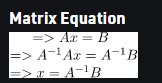

In [42]:
#Inversa de Array Coeficientes
coefArrayInv=np.linalg.inv(coefArray)
coefArrayInv

array([[-1.87618114, -0.63177002, -0.23676071, -0.09648463, -0.04144821,
        -0.01793074, -0.00676149, -0.62295452, -0.41413825, -0.21878817,
        -0.1077296 , -0.05137746, -0.02351325, -0.00911523, -0.2014987 ,
        -0.18304027, -0.11652414, -0.06426813, -0.03281879, -0.01562956,
        -0.0061862 ],
       [-0.63177002, -2.11294184, -0.72825465, -0.27820891, -0.11441536,
        -0.0482097 , -0.01793074, -0.41413825, -0.84174269, -0.52186785,
        -0.27016563, -0.13124285, -0.06049269, -0.02351325, -0.18304027,
        -0.31802284, -0.24730841, -0.14934293, -0.07989769, -0.03900499,
        -0.01562956],
       [-0.23676071, -0.72825465, -2.15439005, -0.74618539, -0.2849704 ,
        -0.11441536, -0.04144821, -0.21878817, -0.52186785, -0.89312015,
        -0.54538109, -0.27928087, -0.13124285, -0.05137746, -0.11652414,
        -0.24730841, -0.35084163, -0.26293796, -0.15552913, -0.07989769,
        -0.03281879],
       [-0.09648463, -0.27820891, -0.74618539, -2.16115154

In [43]:

incogArray=np.matmul(coefArrayInv,indepArray)
#incogArray = incogArray[nVariables-1]
incogArray


array([[ 0.35300681],
       [ 0.91317668],
       [ 2.01031126],
       [ 4.29571775],
       [ 9.1531684 ],
       [19.66317668],
       [43.21014967],
       [ 0.49885056],
       [ 1.28938863],
       [ 2.83235062],
       [ 6.01939133],
       [12.65377919],
       [26.28938863],
       [53.17742199],
       [ 0.35300681],
       [ 0.91317668],
       [ 2.01031126],
       [ 4.29571775],
       [ 9.1531684 ],
       [19.66317668],
       [43.21014967]])

In [44]:
calcArray2 = np.copy(calcArray)
for j in range(1,nPasosY):
    for i in range(1,nPasosX):
        calcArray2[i][j]=incogArray[indicesArray[i][j]]
#calcArray2

In [45]:
#PLOTEO ?
for j in range(0,nPasosY+1):
    for i in range(0,nPasosX+1):
        print("{:8.4f}".format(calcArray2[i][j]), end =' ')
    print("\n")


  0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000 

  0.0000   0.3530   0.9132   2.0103   4.2957   9.1532  19.6632  43.2101 100.0000 

  0.0000   0.4989   1.2894   2.8324   6.0194  12.6538  26.2894  53.1774 100.0000 

  0.0000   0.3530   0.9132   2.0103   4.2957   9.1532  19.6632  43.2101 100.0000 

  0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000 



In [46]:
arrayA = np.array([[1,2,3],[2,5,4]])
arrayB = np.array([[2,1],[3,2],[4,2]])

arrayC = np.matmul(arrayB,arrayA)
print(arrayA)
print(arrayB)
print(arrayC)

[[1 2 3]
 [2 5 4]]
[[2 1]
 [3 2]
 [4 2]]
[[ 4  9 10]
 [ 7 16 17]
 [ 8 18 20]]
